In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [158]:
data = pd.read_csv('Inflation by Month.csv')
print(data)

     Year Month  Inflation
0    1989   JAN        5.7
1    1989   FEB        5.8
2    1989   MAR        5.9
3    1989   APR        5.6
4    1989   MAY        5.9
..    ...   ...        ...
410  2023   MAR        8.9
411  2023   APR        7.8
412  2023   MAY        7.9
413  2023   JUN        7.3
414  2023   JUL        6.4

[415 rows x 3 columns]


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       415 non-null    int64  
 1   Month      415 non-null    object 
 2   Inflation  415 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [160]:
# Create a dictionary mapping month names to integers
month_to_int = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Convert the 'Month' column to integers
data['Month'] = data['Month'].map(month_to_int)

# Display the updated DataFrame
print(data)


     Year  Month  Inflation
0    1989      1        5.7
1    1989      2        5.8
2    1989      3        5.9
3    1989      4        5.6
4    1989      5        5.9
..    ...    ...        ...
410  2023      3        8.9
411  2023      4        7.8
412  2023      5        7.9
413  2023      6        7.3
414  2023      7        6.4

[415 rows x 3 columns]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


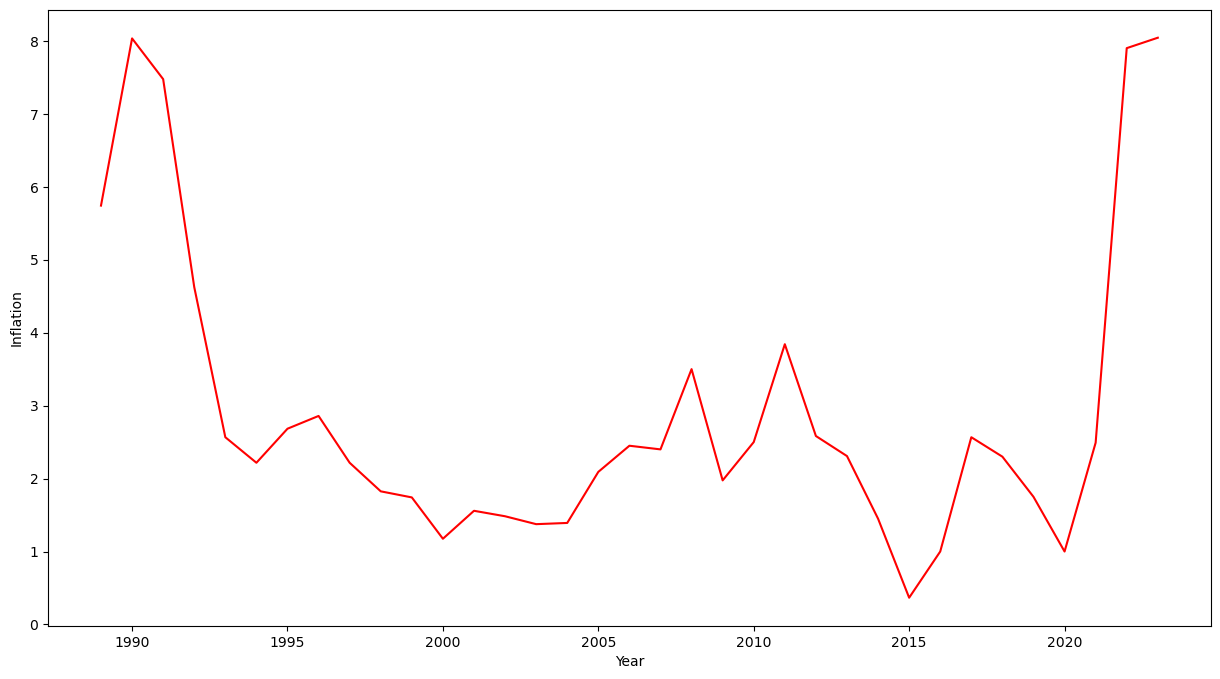

In [161]:
# Aggregate the data by taking the mean inflation value for each year
mean_inflation_by_year = data.groupby('Year')['Inflation'].mean().reset_index()

# Plot the mean inflation values on the scatterplot
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Inflation', data=mean_inflation_by_year, color='red')
plt.show()


In [162]:
X = data.drop('Inflation', axis=1)
y = data['Inflation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# Initialize and train the Random Forest Regressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# Score the model
score = forest.score(X_test, y_test) * 100
print(f"Model Score: {score:.2f}%")

Model Score: 97.08%


In [191]:
forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [59],
    'max_depth': [15],
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [15],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [59]})

In [192]:
print("Best parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 59}


In [193]:
best_forest = grid_search.best_estimator_

In [194]:
# Make predictions on the test data
y_pred = best_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 0.1835617737142628
Mean Absolute Error: 0.2491734897621157
R-squared Score: 0.9702763770473574


In [197]:
# Create new data for the year 2024
months_2024 = pd.DataFrame({'Year': [2024] * 12,
                            'Month': range(1, 13)})
predictions_rf = best_forest.predict(months_2024)

# Extract month from the date
# Convert 'Month' column to datetime format
predictions_df['Month'] = pd.to_datetime(predictions_df['Month'], format='%B').dt.month_name()

# Round predicted inflation to 1 decimal place
predictions_df['Predicted_Inflation'] = predictions_df['Predicted_Inflation'].round(1)

# Print the predictions with corresponding months
print(predictions_df)


        Month  Predicted_Inflation
0     January                  8.4
1    February                  8.3
2       March                  8.0
3       April                  7.7
4         May                  7.5
5        June                  7.5
6        July                  7.0
7      August                  7.0
8   September                  8.4
9     October                  8.8
10   November                  8.9
11   December                  8.7
